In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model

In [2]:
fig_size_1 = (15, 5)
fig_size_2 = (8, 4)
fig_size_3 = (6, 6)
today = datetime.today().strftime('%Y-%m-%d')
start_date = '1970-01-02'
end_date = today
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'XLE', 'IVV', 'VNQ', 'VCSH']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'XOM': 361, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316,
              'XLE': 431, 'IVV': 64, 'VNQ': 118, 'VCSH': 384, 'CASH': (51270.36+55983.17+24000)}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'XOM': 41.51, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54,
              'XLE': 30.12, 'IVV': 267.39, 'VNQ': 76.10, 'VCSH': 78.07, 'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'XOM': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock',
              'XLE': 'ETF', 'IVV': 'Index', 'VNQ': 'REIT', 'VCSH': 'Bond', 'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tickers:
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df = df.append({'Ticker': 'CASH', 'Date' : df['Date'].max() , 'Close' : 1, 'Shares': num_shares['CASH'],
                'Type': asset_type['CASH'], 'Cost': cost_basis['CASH']}, ignore_index=True)

df['Mkt Val'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Mkt Val'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final['Mkt Val %'] = 100*df_final['Mkt Val']/df_final['Mkt Val'].sum()
df_final['Cost Basis %'] = 100*df_final['Cost Basis']/df_final['Cost Basis'].sum()
df_final = df_final.round(2)
df_final

,Date,Close,Shares,Type,Cost,Mkt Val,Cost Basis,Change,Change %,Mkt Val %,Cost Basis %
Ticker,,,,,,,,,,,
AMZN,2021-01-29,3206.20,17.00,Stock,1708.54,54505.40,29045.18,25460.22,87.66,12.66,9.09
AAPL,2021-01-29,131.96,208.00,Stock,45.57,27447.68,9478.56,17969.12,189.58,6.37,2.97
FB,2021-01-29,258.33,74.00,Stock,168.62,19116.42,12477.88,6638.54,53.20,4.44,3.90
GOOGL,2021-01-29,1827.36,10.00,Stock,1110.79,18273.60,11107.90,7165.70,64.51,4.24,3.47
MSFT,2021-01-29,231.96,87.00,Stock,95.20,20180.52,8282.40,11898.12,143.66,4.69,2.59
UBER,2021-01-29,50.93,554.00,Stock,21.65,28215.22,11994.10,16221.12,135.24,6.55,3.75
XOM,2021-01-29,44.84,361.00,Stock,41.51,16187.24,14985.11,1202.13,8.02,3.76,4.69
BA,2021-01-29,194.19,87.00,Stock,137.98,16894.53,12004.26,4890.27,40.74,3.92,3.76
DAL,2021-01-29,37.96,141.00,Stock,23.61,5352.36,3329.01,2023.35,60.78,1.24,1.04


<AxesSubplot:title={'center':'Change'}, xlabel='Ticker'>

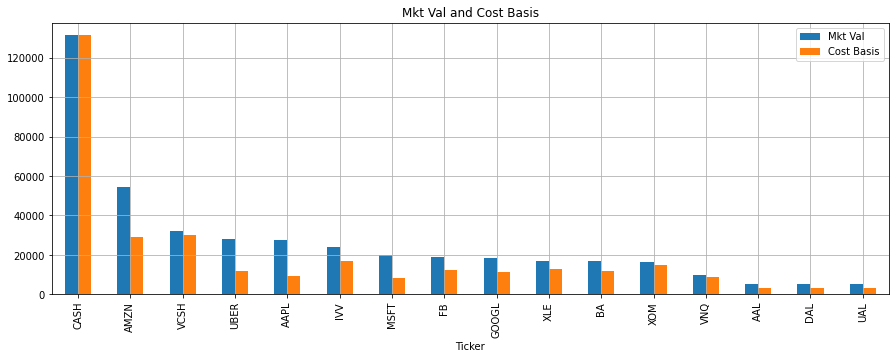

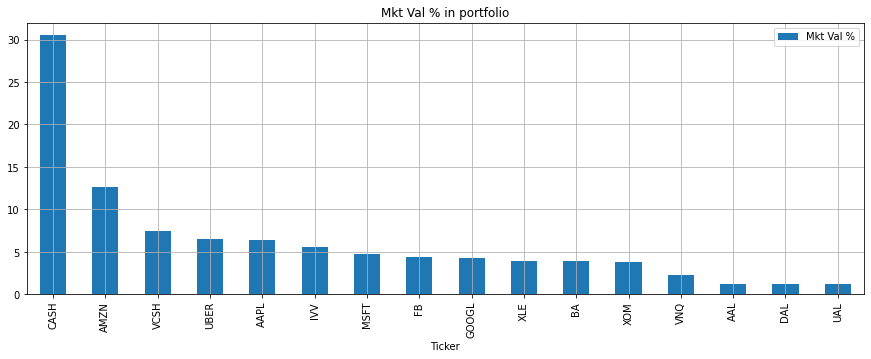

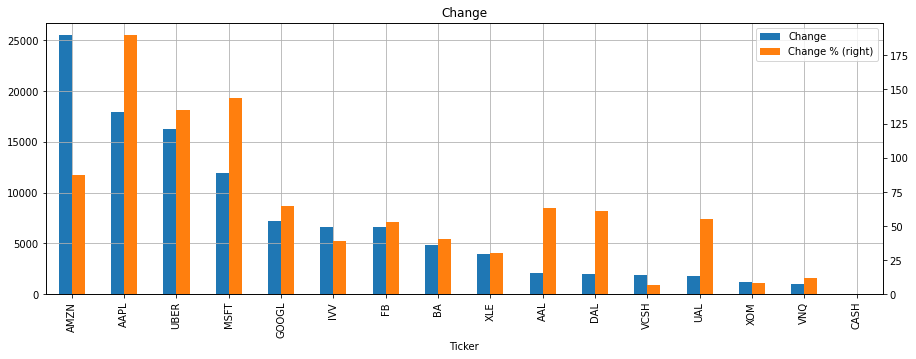

In [5]:
df_final.sort_values(by='Mkt Val', ascending=False).plot(y=['Mkt Val', 'Cost Basis'],
                                                         kind='bar', figsize=fig_size_1, grid=True,
                                                         title='Mkt Val and Cost Basis')
df_final.sort_values(by='Mkt Val %', ascending=False).plot(y=['Mkt Val %'],
                                                         kind='bar', figsize=fig_size_1, grid=True,
                                                         title='Mkt Val % in portfolio')
df_final.sort_values(by='Change', ascending=False).plot(y=['Change', 'Change %'],
                                                        secondary_y='Change %',
                                                        kind='bar', figsize=fig_size_1, grid=True,
                                                        title='Change')

In [6]:
df_final_type = df_final.groupby('Type').sum()[['Mkt Val', 'Cost Basis']]
df_final_type['Mkt Val %'] = 100*df_final_type['Mkt Val']/df_final_type['Mkt Val'].sum()
df_final_type['Cost Basis %'] = 100*df_final_type['Cost Basis']/df_final_type['Cost Basis'].sum()
df_final_type['Change'] = df_final_type['Mkt Val'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type = df_final_type.round(2)
df_final_type

,Mkt Val,Cost Basis,Mkt Val %,Cost Basis %,Change,Change %
Type,,,,,,
Bond,31914.24,29978.88,7.41,9.38,1935.36,6.46
Cash,131253.53,131253.53,30.48,41.06,0.00,0.00
ETF,16946.92,12981.72,3.93,4.06,3965.20,30.54
Index,23777.28,17112.96,5.52,5.35,6664.32,38.94
REIT,10025.28,8979.80,2.33,2.81,1045.48,11.64
Stock,216757.40,119354.21,50.33,37.34,97403.19,81.61


<AxesSubplot:title={'center':'Change'}, xlabel='Type'>

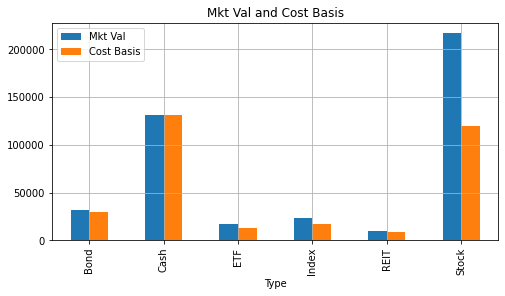

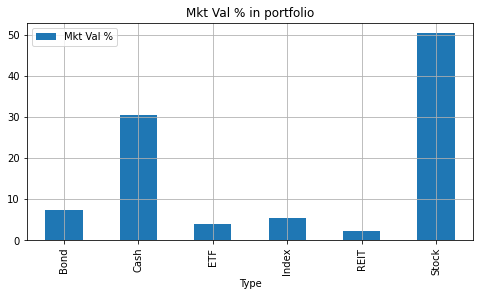

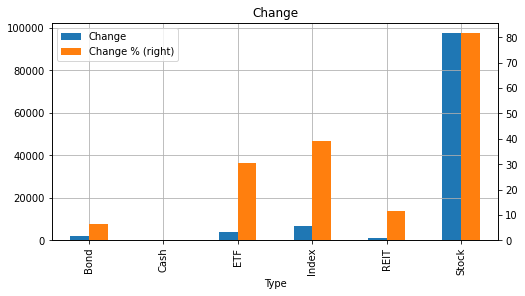

In [7]:
df_final_type.plot(y=['Mkt Val', 'Cost Basis'], kind='bar',
                   figsize=fig_size_2, grid=True, title='Mkt Val and Cost Basis')
df_final_type.plot(y='Mkt Val %', kind='bar',
                   figsize=fig_size_2, grid=True, title='Mkt Val % in portfolio')
df_final_type.plot(y=['Change', 'Change %'], secondary_y=['Change %'], kind='bar',
                   figsize=fig_size_2, grid=True, title='Change')

In [8]:
print('Portfolio value:', df_final_type['Mkt Val'].sum())
print('Cost basis:', df_final_type['Cost Basis'].sum())
print('Change:', df_final_type['Change'].sum())
print('Change %:', round(100*df_final_type['Change'].sum()/df_final_type['Mkt Val'].sum(), 2))

Portfolio value: 430674.65
Cost basis: 319661.1
Change: 111013.55
Change %: 25.78


Chg Portfolio: 10.99
Chg IVV: 13.4
Std dev portfolio 0.826
Std dev IVV 0.91
Beta: 0.791


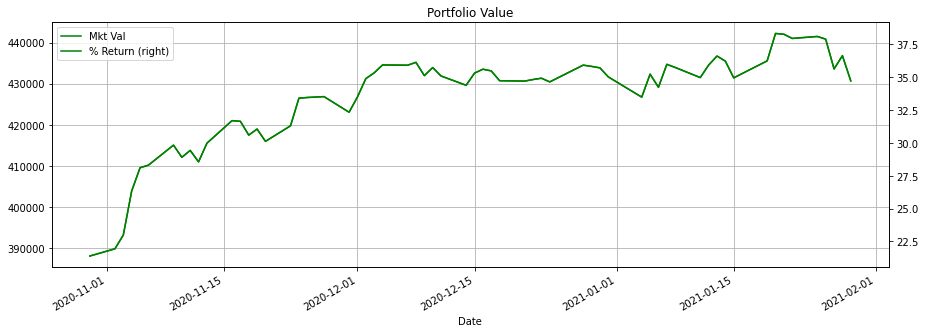

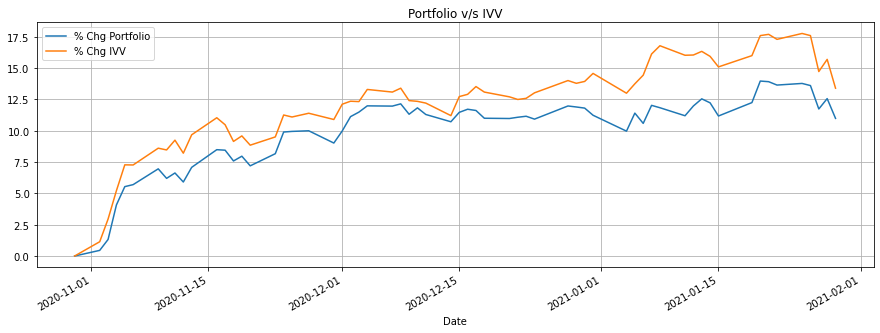

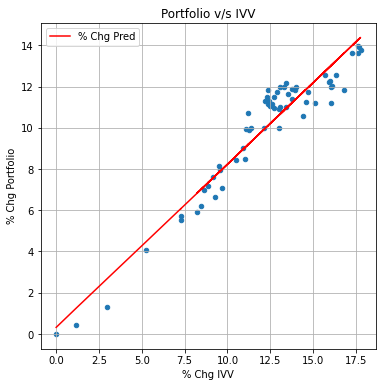

In [9]:
mkt_val = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Mkt Val']) + df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0]
mkt_val = mkt_val.reset_index()

cost_basis = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Cost Basis']) + df[df['Ticker'] == 'CASH'][['Cost Basis']].values[0]
cost_basis = cost_basis.reset_index()

period = three_months

dff = mkt_val[(mkt_val['Date'] >= period) & (mkt_val['Date'] <= end_date)].set_index('Date')
dff['Cost Basis'] = cost_basis[(cost_basis['Date'] >= period) & (cost_basis['Date'] <= end_date)].set_index('Date')['Cost Basis']

dff['Return'] = dff['Mkt Val'] - dff['Cost Basis']
dff['% Return'] = 100*(dff['Mkt Val'] - dff['Cost Basis'])/dff['Cost Basis']
dff['% Chg Portfolio'] = 100*(dff['Mkt Val']-dff.head(1)['Mkt Val'].values[0])/dff.head(1)['Mkt Val'].values[0]
dff['Close IVV'] = df[(df['Ticker'] == 'IVV') & (df['Date'] >= period) & (df['Date'] <= end_date)][['Date', 'Close']].set_index('Date')
dff['% Chg IVV'] = 100*(dff['Close IVV']-dff.head(1)['Close IVV'].values[0])/dff.head(1)['Close IVV'].values[0]

model = linear_model.LinearRegression()
model.fit(np.array(dff[['% Chg IVV']]), np.array(dff[['% Chg Portfolio']]))

dff['% Chg Pred'] = model.predict(np.array(dff[['% Chg IVV']]))
dff = dff.round(2)

dff.plot(y=['Mkt Val', '% Return'], secondary_y='% Return', color=['green', 'green'],
         figsize=fig_size_1, grid=True, title='Portfolio Value')

dff.plot(y=['% Chg Portfolio', '% Chg IVV'], figsize=fig_size_1, grid=True, title='Portfolio v/s IVV')

fig, axes = plt.subplots(sharex=True)
dff.plot(x='% Chg IVV', y='% Chg Portfolio', kind='scatter',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')
dff.plot(x='% Chg IVV', y='% Chg Pred', kind='line', color='Red',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')

print('Chg Portfolio:', dff.tail(1)['% Chg Portfolio'].values[0])
print('Chg IVV:', dff.tail(1)['% Chg IVV'].values[0])

print('Std dev portfolio', round(100*dff.pct_change().std()['Mkt Val'], 3))
print('Std dev IVV', round(100*dff.pct_change().std()['Close IVV'], 3))

print('Beta:', round(model.coef_[0][0], 3))